<a href="https://colab.research.google.com/github/riddhichhabra/phys-207-jumping-ring/blob/main/Phys_207_Honors_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phys 207: Modelling the Jumping Rings

### Fitting the Axial Magnetic Field
We begin by finding the fit for $B_z$, the axial field.

/tmp/ipython-input-2080303083.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(B_axial_model, z_data, B_data)


Fitted C = mu_r * I = 109.800


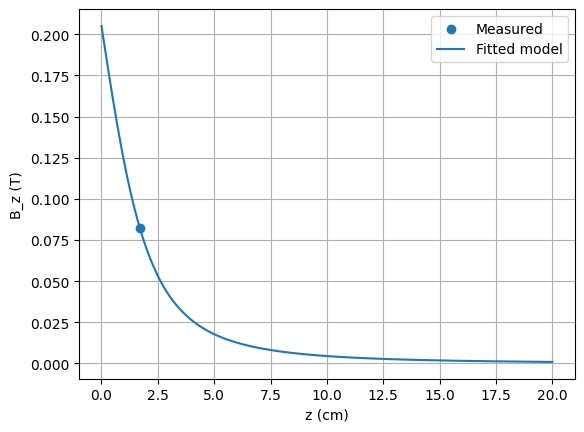

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

mu0 = 4*np.pi*1e-7

# solenoid parameters
L = 0.17          # solenoid length
R = 0.023         # solenoid radius
n = 3000          # turns per meter

def B_axial_model(z, C):
    geom = 0.5 * (
        (z + L)/np.sqrt((z + L)**2 + R**2)
        - z/np.sqrt(z**2 + R**2)
    )
    return mu0 * n * C * geom

# axial positions (meters)
z_data = np.array([0.017])

# measured axial field (tesla)
B_data = np.array([0.0824])

popt, pcov = curve_fit(B_axial_model, z_data, B_data)
C_fit = popt[0]

print(f"Fitted C = mu_r * I = {C_fit:.3f}")

z_plot = np.linspace(0, 0.2, 200)
B_fit = B_axial_model(z_plot, C_fit)

import matplotlib.pyplot as plt
plt.scatter(z_data*100, B_data, label="Measured")
plt.plot(z_plot*100, B_fit, label="Fitted model")
plt.xlabel("z (cm)")
plt.ylabel("B_z (T)")
plt.legend()
plt.grid()
plt.show()

### Room Temperature Simulations

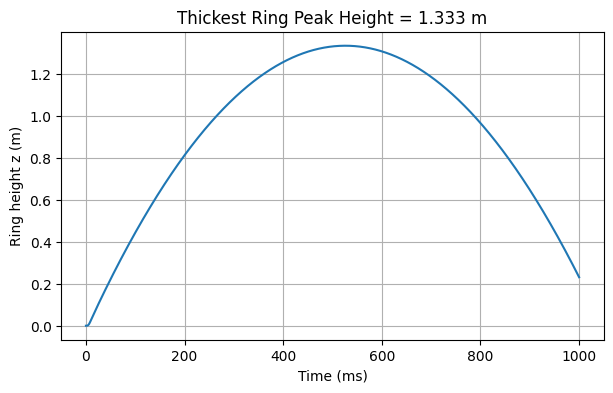

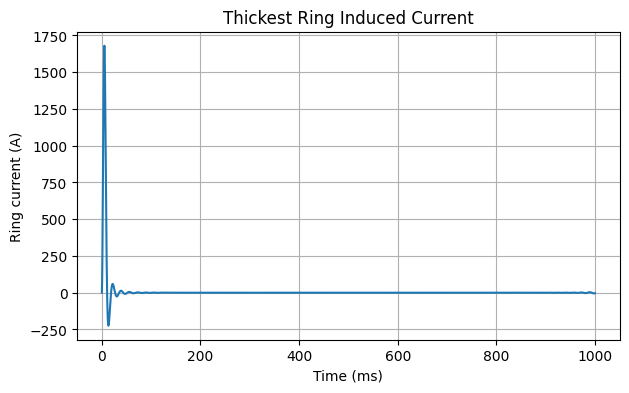

Ring resistance: 6.1786e-05 ohm
Ring inductance: 1.1194e-07 H
Predicted peak height: 1.333 m


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# constants
mu0 = 4*np.pi*1e-7
g = 9.81

# ring parameters (thick)
m = 0.0251                 # kg
r_ring = 0.02373           # mean radius (m)
h_ring = 0.01986           # height (m)
t_ring = 0.02534 - 0.02212 # thickness (m)

rho_Al = 2.65e-8
R_ring = rho_Al * (2*np.pi*r_ring) / (h_ring * t_ring)

# ring self inductance
L_ring = mu0*np.pi*r_ring*r_ring/h_ring

# coil / field parameters
r_sol = 0.023
L_sol = 0.17
n = 3000
omega = 2*np.pi*60

# from axial fit
C = 109.8      # μ_r * I  (A)

# radial field fit
B_r0 = 0.102
z0_decay = 0.22

# axial magnetic field (finite solenoid)
def B_axial(z):
    geom = 0.5 * (
        (z + L_sol)/np.sqrt((z + L_sol)**2 + r_sol**2)
        - z/np.sqrt(z**2 + r_sol**2)
    )
    return mu0 * n * C * geom

# radial magnetic field (fit)
def B_radial(z):
    return B_r0 * np.exp(-z/z0_decay)

# ODE system
def deriv(t, y):
    z, v, i = y

    # Induced EMF from axial field
    Phi_dot = np.pi * r_ring**2 * omega * B_axial(z) * np.sin(omega*t)
    E = Phi_dot

    # Ring current evolution (RL)
    di_dt = (E - R_ring*i) / L_ring

    # Magnetic force from radial field
    F_mag = 2*np.pi * r_ring * i * B_radial(z)

    a = F_mag/m - g

    return [v, a, di_dt]


# Initial conditions
y0 = [0.0, 0.0, 0.0]   # z, v, i

t_span = (0, 1)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-7)

z = sol.y[0]
v = sol.y[1]
i_ring = sol.y[2]
t = sol.t

peak_height = np.max(z)

plt.figure(figsize=(7,4))
plt.plot(t*1000, z)
plt.xlabel('Time (ms)')
plt.ylabel('Ring height z (m)')
plt.title(f'Thickest Ring Peak Height = {peak_height:.3f} m')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t*1000, i_ring)
plt.xlabel('Time (ms)')
plt.ylabel('Ring current (A)')
plt.title('Thickest Ring Induced Current')
plt.grid()
plt.show()

print(f"Ring resistance: {R_ring:.4e} ohm")
print(f"Ring inductance: {L_ring:.4e} H")
print(f"Predicted peak height: {peak_height:.3f} m")


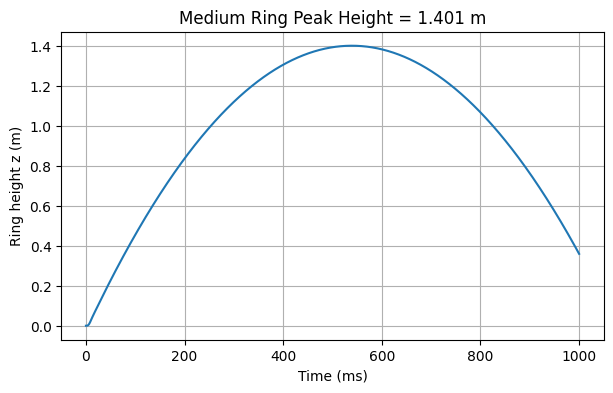

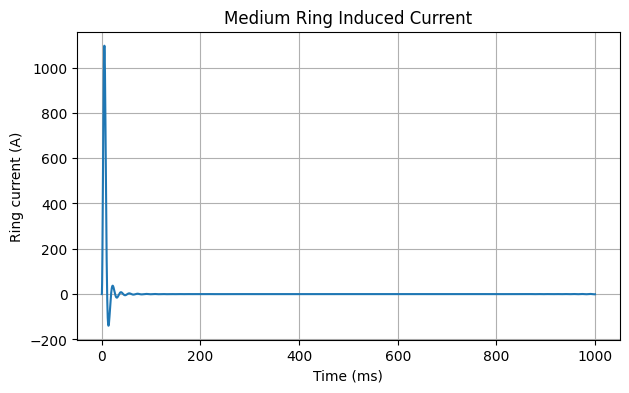

Ring resistance: 9.3551e-05 ohm
Ring inductance: 1.7446e-07 H
Predicted peak height: 1.401 m


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# constants
mu0 = 4*np.pi*1e-7
g = 9.81

# ring parameters (medium thickness)
m = 0.0161                 # kg
r_ring = 0.02369           # mean radius (m)
h_ring = 0.01270           # height (m)
t_ring = 0.02535 - 0.02203 # thickness (m)

rho_Al = 2.65e-8
R_ring = rho_Al * (2*np.pi*r_ring) / (h_ring * t_ring)

# ring self inductance
L_ring = mu0*np.pi*r_ring*r_ring/h_ring

# coil / field parameters
r_sol = 0.023
L_sol = 0.17
n = 3000
omega = 2*np.pi*60

# From axial fit
C = 109.8      # μ_r * I  (A)

# radial field fit
B_r0 = 0.102
z0_decay = 0.22

# axial magnetic field (finite solenoid)
def B_axial(z):
    geom = 0.5 * (
        (z + L_sol)/np.sqrt((z + L_sol)**2 + r_sol**2)
        - z/np.sqrt(z**2 + r_sol**2)
    )
    return mu0 * n * C * geom

# radial magnetic field (fit)
def B_radial(z):
    return B_r0 * np.exp(-z/z0_decay)

# ODE system
def deriv(t, y):
    z, v, i = y

    # Induced EMF from axial field
    Phi_dot = np.pi * r_ring**2 * omega * B_axial(z) * np.sin(omega*t)
    E = Phi_dot

    # Ring current evolution (RL)
    di_dt = (E - R_ring*i) / L_ring

    # Magnetic force from radial field
    F_mag = 2*np.pi * r_ring * i * B_radial(z)

    a = F_mag/m - g

    return [v, a, di_dt]

# Initial conditions
y0 = [0.0, 0.0, 0.0]   # z, v, i

t_span = (0, 1)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-7)

z = sol.y[0]
v = sol.y[1]
i_ring = sol.y[2]
t = sol.t

peak_height = np.max(z)

plt.figure(figsize=(7,4))
plt.plot(t*1000, z)
plt.xlabel('Time (ms)')
plt.ylabel('Ring height z (m)')
plt.title(f'Medium Ring Peak Height = {peak_height:.3f} m')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t*1000, i_ring)
plt.xlabel('Time (ms)')
plt.ylabel('Ring current (A)')
plt.title('Medium Ring Induced Current')
plt.grid()
plt.show()

print(f"Ring resistance: {R_ring:.4e} ohm")
print(f"Ring inductance: {L_ring:.4e} H")
print(f"Predicted peak height: {peak_height:.3f} m")


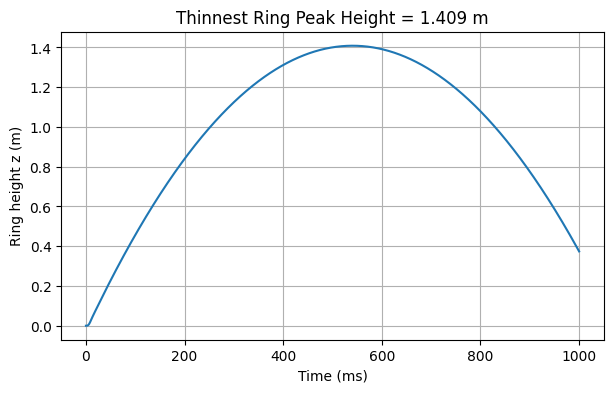

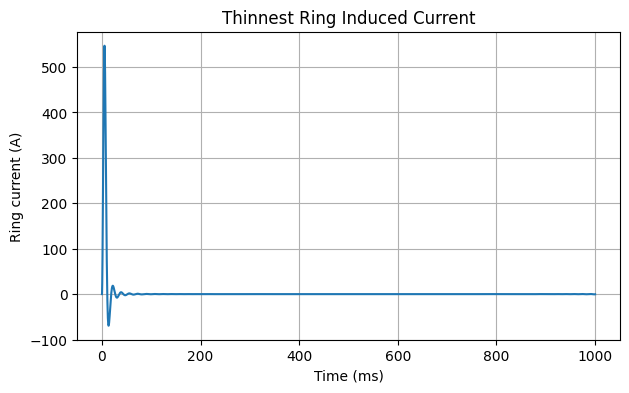

Ring resistance: 1.8844e-04 ohm
Ring inductance: 3.4761e-07 H
Predicted peak height: 1.409 m


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# constants
mu0 = 4*np.pi*1e-7
g = 9.81

# ring parameters (thick)
m = 0.0080                 # kg
r_ring = 0.02372           # mean radius (m)
h_ring = 0.00639           # height (m)
t_ring = 0.02536 - 0.02208 # thickness (m)

rho_Al = 2.65e-8
R_ring = rho_Al * (2*np.pi*r_ring) / (h_ring * t_ring)

# ring self inductance
L_ring = mu0*np.pi*r_ring*r_ring/h_ring

# coil / field parameters
r_sol = 0.023
L_sol = 0.17
n = 3000
omega = 2*np.pi*60

# from axial fit
C = 109.8      # μ_r * I  (A)

# radial field fit
B_r0 = 0.102
z0_decay = 0.22

# axial magnetic field (finite solenoid)
def B_axial(z):
    geom = 0.5 * (
        (z + L_sol)/np.sqrt((z + L_sol)**2 + r_sol**2)
        - z/np.sqrt(z**2 + r_sol**2)
    )
    return mu0 * n * C * geom

# radial magnetic field (fit)
def B_radial(z):
    return B_r0 * np.exp(-z/z0_decay)

# ODE system
def deriv(t, y):
    z, v, i = y

    # Induced EMF from axial field
    Phi_dot = np.pi * r_ring**2 * omega * B_axial(z) * np.sin(omega*t)
    E = Phi_dot

    # Ring current evolution (RL)
    di_dt = (E - R_ring*i) / L_ring

    # Magnetic force from radial field
    F_mag = 2*np.pi * r_ring * i * B_radial(z)

    a = F_mag/m - g

    return [v, a, di_dt]


# Initial conditions
y0 = [0.0, 0.0, 0.0]   # z, v, i

t_span = (0, 1)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-7)

z = sol.y[0]
v = sol.y[1]
i_ring = sol.y[2]
t = sol.t

peak_height = np.max(z)

plt.figure(figsize=(7,4))
plt.plot(t*1000, z)
plt.xlabel('Time (ms)')
plt.ylabel('Ring height z (m)')
plt.title(f'Thinnest Ring Peak Height = {peak_height:.3f} m')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t*1000, i_ring)
plt.xlabel('Time (ms)')
plt.ylabel('Ring current (A)')
plt.title('Thinnest Ring Induced Current')
plt.grid()
plt.show()

print(f"Ring resistance: {R_ring:.4e} ohm")
print(f"Ring inductance: {L_ring:.4e} H")
print(f"Predicted peak height: {peak_height:.3f} m")


### Using $LN_2$
The resistivity of aluminum is changed. The temperature coefficient of aluminum is  0.0039 per degree C and the temperature at which liquid nitrogen boils is -196. We conducted the experiment at 68 F or 20 C and the resistivity of aluminum at that temperature is 2.65e-8. Thus, at -196 the resistivity will be:

In [ ]:
rho_20C = 2.65e-8
alpha = 0.0039
T0 = 20
T_LN2 = -196

rho_LN2 = rho_20C * (1 + alpha * (T_LN2 - T0))

print(f"Al resistivity at LN2 temperature: {rho_LN2:.2e} ohm·m")


Al resistivity at LN2 temperature: 4.18e-09 ohm·m


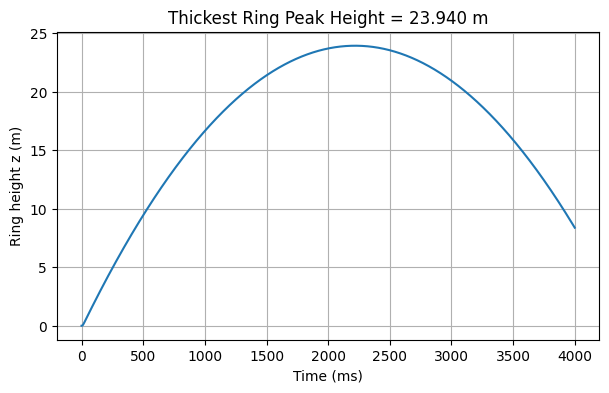

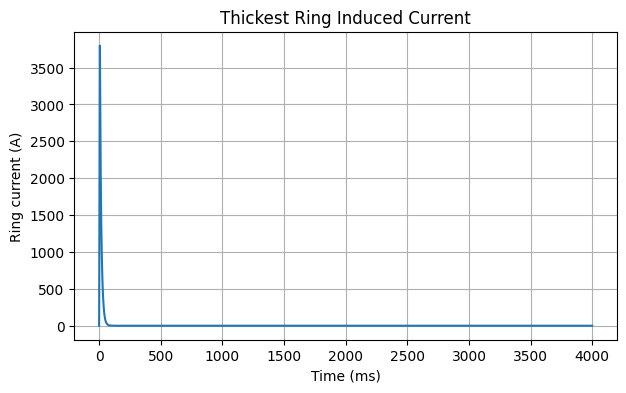

Ring resistance: 9.7458e-06 ohm
Ring inductance: 1.1194e-07 H
Predicted peak height: 23.940 m


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# constants
mu0 = 4*np.pi*1e-7
g = 9.81

# ring parameters (thick)
m = 0.0251                 # kg
r_ring = 0.02373           # mean radius (m)
h_ring = 0.01986           # height (m)
t_ring = 0.02534 - 0.02212 # thickness (m)

rho_Al = 4.18e-09
R_ring = rho_Al * (2*np.pi*r_ring) / (h_ring * t_ring)

# ring self inductance
L_ring = mu0*np.pi*r_ring*r_ring/h_ring

# coil / field parameters
r_sol = 0.023
L_sol = 0.17
n = 3000
omega = 2*np.pi*60

# from axial fit
C = 109.8      # μ_r * I  (A)

# radial field fit
B_r0 = 0.102
z0_decay = 0.22

# axial magnetic field (finite solenoid)
def B_axial(z):
    geom = 0.5 * (
        (z + L_sol)/np.sqrt((z + L_sol)**2 + r_sol**2)
        - z/np.sqrt(z**2 + r_sol**2)
    )
    return mu0 * n * C * geom

# radial magnetic field (fit)
def B_radial(z):
    return B_r0 * np.exp(-z/z0_decay)

# ODE system
def deriv(t, y):
    z, v, i = y

    # Induced EMF from axial field
    Phi_dot = np.pi * r_ring**2 * omega * B_axial(z) * np.sin(omega*t)
    E = Phi_dot

    # Ring current evolution (RL)
    di_dt = (E - R_ring*i) / L_ring

    # Magnetic force from radial field
    F_mag = 2*np.pi * r_ring * i * B_radial(z)

    a = F_mag/m - g

    return [v, a, di_dt]


# Initial conditions
y0 = [0.0, 0.0, 0.0]   # z, v, i

t_span = (0, 4)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-7)

z = sol.y[0]
v = sol.y[1]
i_ring = sol.y[2]
t = sol.t

peak_height = np.max(z)

plt.figure(figsize=(7,4))
plt.plot(t*1000, z)
plt.xlabel('Time (ms)')
plt.ylabel('Ring height z (m)')
plt.title(f'Thickest Ring Peak Height = {peak_height:.3f} m')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t*1000, i_ring)
plt.xlabel('Time (ms)')
plt.ylabel('Ring current (A)')
plt.title('Thickest Ring Induced Current')
plt.grid()
plt.show()

print(f"Ring resistance: {R_ring:.4e} ohm")
print(f"Ring inductance: {L_ring:.4e} H")
print(f"Predicted peak height: {peak_height:.3f} m")


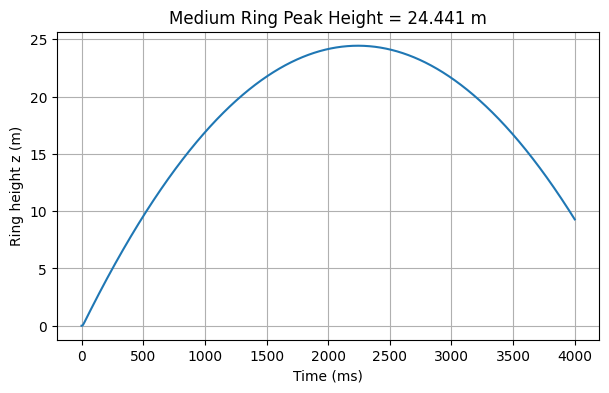

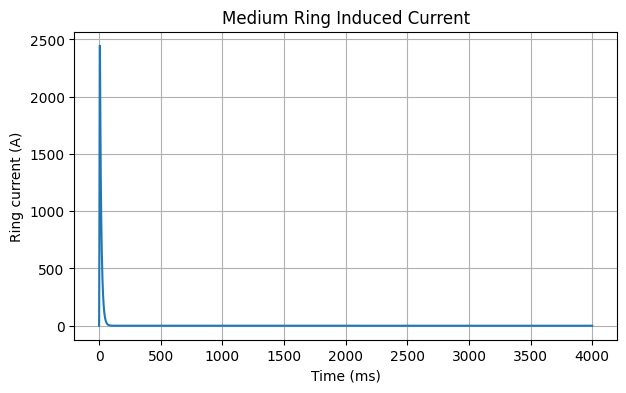

Ring resistance: 1.4756e-05 ohm
Ring inductance: 1.7446e-07 H
Predicted peak height: 24.441 m


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# constants
mu0 = 4*np.pi*1e-7
g = 9.81

# ring parameters (medium thickness)
m = 0.0161                 # kg
r_ring = 0.02369           # mean radius (m)
h_ring = 0.01270           # height (m)
t_ring = 0.02535 - 0.02203 # thickness (m)

rho_Al = 4.18e-09
R_ring = rho_Al * (2*np.pi*r_ring) / (h_ring * t_ring)

# ring self inductance
L_ring = mu0*np.pi*r_ring*r_ring/h_ring

# coil / field parameters
r_sol = 0.023
L_sol = 0.17
n = 3000
omega = 2*np.pi*60

# From axial fit
C = 109.8      # μ_r * I  (A)

# radial field fit
B_r0 = 0.102
z0_decay = 0.22

# axial magnetic field (finite solenoid)
def B_axial(z):
    geom = 0.5 * (
        (z + L_sol)/np.sqrt((z + L_sol)**2 + r_sol**2)
        - z/np.sqrt(z**2 + r_sol**2)
    )
    return mu0 * n * C * geom

# radial magnetic field (fit)
def B_radial(z):
    return B_r0 * np.exp(-z/z0_decay)

# ODE system
def deriv(t, y):
    z, v, i = y

    # Induced EMF from axial field
    Phi_dot = np.pi * r_ring**2 * omega * B_axial(z) * np.sin(omega*t)
    E = Phi_dot

    # Ring current evolution (RL)
    di_dt = (E - R_ring*i) / L_ring

    # Magnetic force from radial field
    F_mag = 2*np.pi * r_ring * i * B_radial(z)

    a = F_mag/m - g

    return [v, a, di_dt]

# Initial conditions
y0 = [0.0, 0.0, 0.0]   # z, v, i

t_span = (0, 4)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-7)

z = sol.y[0]
v = sol.y[1]
i_ring = sol.y[2]
t = sol.t

peak_height = np.max(z)

plt.figure(figsize=(7,4))
plt.plot(t*1000, z)
plt.xlabel('Time (ms)')
plt.ylabel('Ring height z (m)')
plt.title(f'Medium Ring Peak Height = {peak_height:.3f} m')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t*1000, i_ring)
plt.xlabel('Time (ms)')
plt.ylabel('Ring current (A)')
plt.title('Medium Ring Induced Current')
plt.grid()
plt.show()

print(f"Ring resistance: {R_ring:.4e} ohm")
print(f"Ring inductance: {L_ring:.4e} H")
print(f"Predicted peak height: {peak_height:.3f} m")


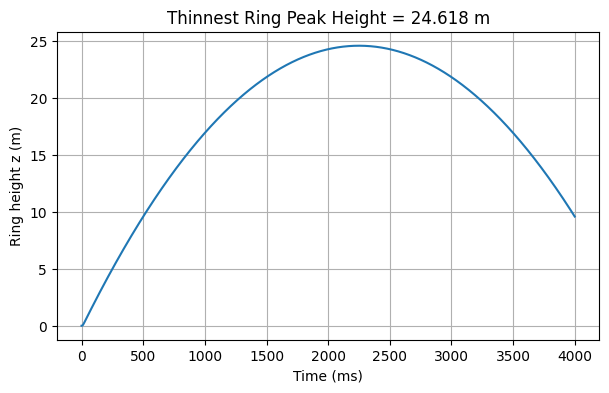

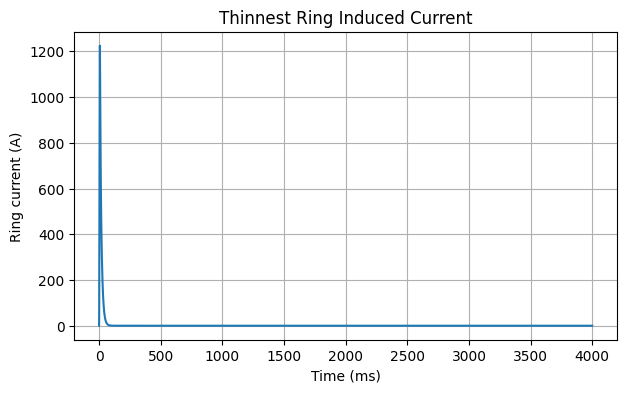

Ring resistance: 2.9723e-05 ohm
Ring inductance: 3.4761e-07 H
Predicted peak height: 24.618 m


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# constants
mu0 = 4*np.pi*1e-7
g = 9.81

# ring parameters (thick)
m = 0.0080                 # kg
r_ring = 0.02372           # mean radius (m)
h_ring = 0.00639           # height (m)
t_ring = 0.02536 - 0.02208 # thickness (m)

rho_Al = 4.18e-09
R_ring = rho_Al * (2*np.pi*r_ring) / (h_ring * t_ring)

# ring self inductance
L_ring = mu0*np.pi*r_ring*r_ring/h_ring

# coil / field parameters
r_sol = 0.023
L_sol = 0.17
n = 3000
omega = 2*np.pi*60

# from axial fit
C = 109.8      # μ_r * I  (A)

# radial field fit
B_r0 = 0.102
z0_decay = 0.22

# axial magnetic field (finite solenoid)
def B_axial(z):
    geom = 0.5 * (
        (z + L_sol)/np.sqrt((z + L_sol)**2 + r_sol**2)
        - z/np.sqrt(z**2 + r_sol**2)
    )
    return mu0 * n * C * geom

# radial magnetic field (fit)
def B_radial(z):
    return B_r0 * np.exp(-z/z0_decay)

# ODE system
def deriv(t, y):
    z, v, i = y

    # Induced EMF from axial field
    Phi_dot = np.pi * r_ring**2 * omega * B_axial(z) * np.sin(omega*t)
    E = Phi_dot

    # Ring current evolution (RL)
    di_dt = (E - R_ring*i) / L_ring

    # Magnetic force from radial field
    F_mag = 2*np.pi * r_ring * i * B_radial(z)

    a = F_mag/m - g

    return [v, a, di_dt]


# Initial conditions
y0 = [0.0, 0.0, 0.0]   # z, v, i

t_span = (0, 4)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-7)

z = sol.y[0]
v = sol.y[1]
i_ring = sol.y[2]
t = sol.t

peak_height = np.max(z)

plt.figure(figsize=(7,4))
plt.plot(t*1000, z)
plt.xlabel('Time (ms)')
plt.ylabel('Ring height z (m)')
plt.title(f'Thinnest Ring Peak Height = {peak_height:.3f} m')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(t*1000, i_ring)
plt.xlabel('Time (ms)')
plt.ylabel('Ring current (A)')
plt.title('Thinnest Ring Induced Current')
plt.grid()
plt.show()

print(f"Ring resistance: {R_ring:.4e} ohm")
print(f"Ring inductance: {L_ring:.4e} H")
print(f"Predicted peak height: {peak_height:.3f} m")
